In [20]:
import os
from anthropic import Anthropic, RateLimitError
from dotenv import load_dotenv
from time import sleep

In [9]:
def llm_call(prompt: str, tools: str = "", system_prompt: str = "", model="claude-opus-4-20250514") -> str:
    """
    Calls the model with the given prompt and returns the response.

    Args:
        prompt (str): The user prompt to send to the model.
        tools (str): The tools used by the model. Defaults to basic web search.
        system_prompt (str, optional): The system prompt to send to the model. Defaults to "".
        model (str, optional): The model to use for the call. Defaults to "claude-3-5-sonnet-20241022".

    Returns:
        str: The response from the language model.
    """
    load_dotenv()
    anthropic_api_key = os.getenv("ANTHROPIC_API_KEY")
    seconds_sleep = 60

    # client = Anthropic(api_key=os.environ["ANTHROPIC_API_KEY"])
    client = Anthropic(api_key=anthropic_api_key)
    messages = [
        {"role": "user", "content": prompt}]
    if tools == '':
        tools = [{
            "type": "web_search_20250305",
            "name": "web_search",
            "max_uses": 5
        }]

    try:
        ret_response = client.messages.create(
            model=model,
            max_tokens=1000,
            system=system_prompt,
            messages=messages,
            tools=tools,
            temperature=0
        )
    except RateLimitError as err:
        print(err)
        print(f'Pausing for {seconds_sleep} seconds before next attempt.')
        sleep(seconds_sleep) #
        ret_response = llm_call(prompt, system_prompt)
    return ret_response

In [10]:
prompt = [{
          "type": "text",
          "text": "List the top 10 company symbols that are part of S&P500 and have had the highest volume in the last month. "
        }]

system_prompt = """Transform the following natural language requests
                    into valid SQL queries. Assume a database with
                     the following tables and columns exists:


                    industrybackground:
                        +-----------+--------------+------+-----+---------+-------+
                        | Field     | Type         | Null | Key | Default | Extra |
                        +-----------+--------------+------+-----+---------+-------+
                        | symbol    | varchar(10)  | NO   | PRI | NULL    |       |
                        | name      | varchar(100) | YES  |     | NULL    |       |
                        | LastSale  | double(9,3)  | YES  |     | NULL    |       |
                        | MarketCap | varchar(10)  | YES  |     | NULL    |       |
                        | IPOYear   | varchar(4)   | YES  |     | NULL    |       |
                        | Sector    | varchar(30)  | YES  |     | NULL    |       |
                        | Industry  | varchar(100) | YES  |     | NULL    |       |
                        | SnP500    | tinyint(1)   | YES  |     | NULL    |       |
                        +-----------+--------------+------+-----+---------+-------+

                    equities_historic_data:
                        +------------+-------------+------+-----+---------+-------+
                        | Field      | Type        | Null | Key | Default | Extra |
                        +------------+-------------+------+-----+---------+-------+
                        | symbol     | varchar(10) | NO   | PRI | NULL    |       |
                        | open       | double(9,3) | YES  |     | NULL    |       |
                        | high       | double(9,3) | YES  |     | NULL    |       |
                        | low        | double(9,3) | YES  |     | NULL    |       |
                        | close      | double(9,3) | YES  |     | NULL    |       |
                        | netChange  | double(8,3) | YES  |     | NULL    |       |
                        | pcntChange | double(5,2) | YES  |     | NULL    |       |
                        | volume     | int         | YES  |     | NULL    |       |
                        | date       | date        | NO   | PRI | NULL    |       |
                        +------------+-------------+------+-----+---------+-------+"""



In [11]:
response = llm_call(prompt, "", system_prompt)
print("\n----------------------")
print("Response content:")
for content_block in response.content:
    if content_block.type == "text":
        print(content_block.text)


----------------------
Response content:
I'll help you find the top 10 S&P 500 companies with the highest trading volume in the last month. Let me search for the current date to ensure we get the most recent month's data.
Based on the search results, I can see that 
today's date is Friday, June 20, 2025
. Now I'll create a SQL query to find the top 10 S&P 500 companies with the highest trading volume in the last month (from May 20, 2025 to June 20, 2025).

Here's the SQL query:

```sql
SELECT 
    ib.symbol,
    ib.name,
    SUM(ehd.volume) as total_volume
FROM 
    industrybackground ib
    INNER JOIN equities_historic_data ehd ON ib.symbol = ehd.symbol
WHERE 
    ib.SnP500 = 1
    AND ehd.date >= DATE_SUB('2025-06-20', INTERVAL 1 MONTH)
    AND ehd.date <= '2025-06-20'
GROUP BY 
    ib.symbol, ib.name
ORDER BY 
    total_volume DESC
LIMIT 10;
```

This query:
1. Joins the `industrybackground` and `equities_historic_data` tables on the symbol column
2. Filters for companies that are 

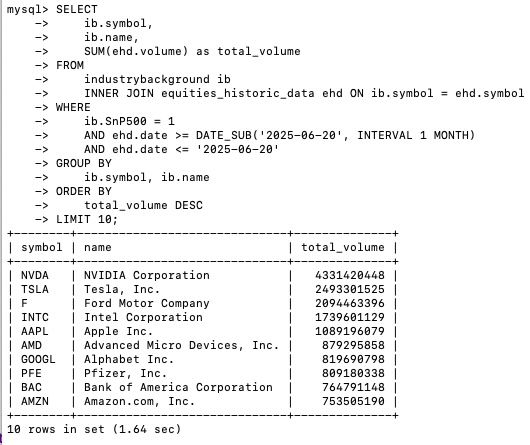

In [19]:
# Cross check SQL with mysql run
from IPython.display import Image
Image(filename='/Users/peeyushsharma/Dropbox/Programming/python/JupyterNotebooks/LLMs/SQL_OP_1.jpg')